In [1]:
import pandas as pd 
import numpy as np
import networkx as nx
from os import listdir
from os.path import isfile, join
# import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter

In [2]:
def get_files(path,sufix):
    """ Returns list of files on specified path with specified sufix
    """
    mypath = path
    return [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.endswith(sufix)]

In [3]:
def is_unidirectional(graph, node1, node2):
    if graph.has_edge(node1, node2) == graph.has_edge(node2, node1):
        return False
    return True

In [4]:
def count_unidirectional_pairs(d_graph):
    edges = d_graph.edges()
    count = 0
    for edge_pair in edges:
        if is_unidirectional(d_graph, edge_pair[0], edge_pair[1]) == True:
            count += 1 
    return count

In [5]:
def fraction_unidirected_pairs(d_graph):
    try:
        return round(count_unidirectional_pairs(d_graph)/len(d_graph.edges()),2)
    except:
        return None

# Fraction of unidirectional links in the network over time (General)

In [6]:
files = get_files("../data/graphs/", "12_dir")

In [7]:
lst = []
for file in files: 
    d_graph = nx.read_gpickle(join("../data/graphs", file))
    lst.append(fraction_unidirected_pairs(d_graph))

In [8]:
# g = sns.pointplot(files, lst)

In [9]:
def plot_overall(image_name="overall.png", range_yaxis = [0.5,1]):
    x_label = [f.replace("_12_dir", "") for f in files]
    fig, ax = plt.subplots(figsize=(10, 7))
    plt.plot(x_label, lst, marker="o")
    plt.xticks(x_label, rotation=50, fontsize=13, weight="bold")
    plt.xlabel("Year", fontsize=15, weight="bold")
    plt.yticks(fontsize=13, weight="bold")
    plt.ylabel("Unidirectional links in the Network", fontsize=15, weight="bold")
    ax.set_ylim(range_yaxis)
    plt.savefig("../plots/unidirectional_links/"+image_name,bbox_inches = 'tight')
    plt.show()

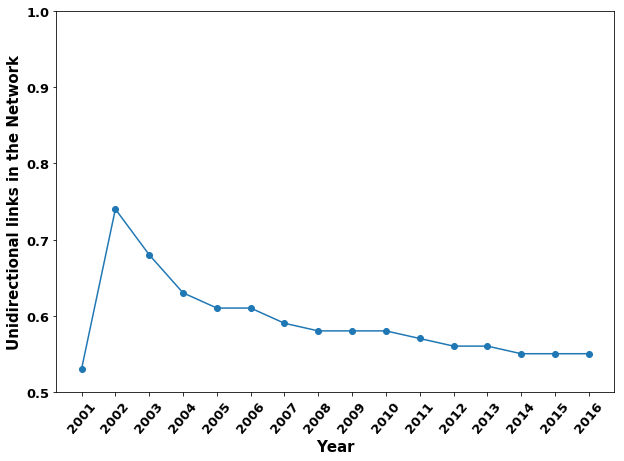

In [10]:
plot_overall()

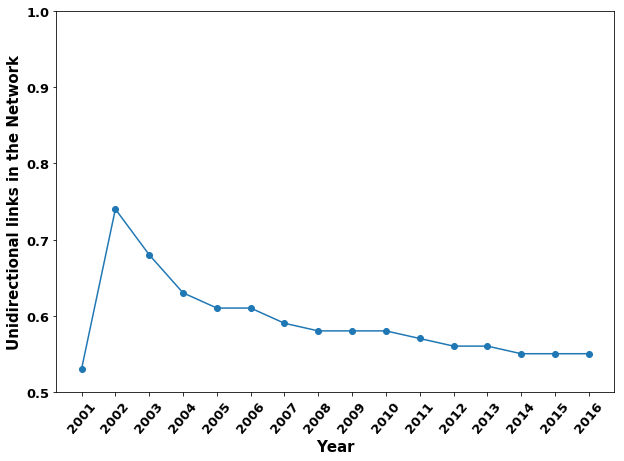

In [11]:
plot_overall(image_name="overall_zoom.png",range_yaxis=[0.5,1])

# Fraction of unidirectional links (Male to Female and Female to Male) in the network over time (General)

In [12]:
# d_graph = nx.read_gpickle(join("../data/graphs", files[15]))

In [13]:
def filter_for_gender(d_graph, gender_from, gender_to):
    edges = d_graph.edges()
#     print(len(edges))
    for edge_pair in edges:
        if d_graph.node[edge_pair[0]]["gender"] != gender_from or d_graph.node[edge_pair[1]]["gender"] != gender_to:
            edges.remove(edge_pair)
#     print(len(edges))
    return edges

In [14]:
def fraction_unidirected_pairs_gender(graph, gender_from, gender_to):
    edges = filter_for_gender(graph, gender_from, gender_to)
    dg = nx.DiGraph(edges)
    try:
        return count_unidirectional_pairs(dg)/count_unidirectional_pairs(graph)
    except:
        return None

In [15]:
def gender_fractions_over_time(files, gender_from, gender_to):
    lst = []
    for file in files: 
        d_graph = nx.read_gpickle(join("../data/graphs", file))
        lst.append(fraction_unidirected_pairs_gender(d_graph, gender_from, gender_to))
    return lst

In [16]:
def plot_male_to_female(image_name="male_female.png", range_yaxis = [0.5,1]):
    x_label = [f.replace("_12_dir", "") for f in files]
    fig, ax = plt.subplots(figsize=(10, 7))
    plt.plot(x_label, m_f_lst, marker="o", label="male to female")
    plt.plot(x_label, f_m_lst, marker="*", label="female to male")
    plt.xticks(x_label, rotation=50, fontsize=13, weight="bold")
    plt.xlabel("Year", fontsize=15, weight="bold")
    plt.yticks(fontsize=13, weight="bold")
    plt.ylabel("Unidirectional links in the Network", fontsize=15, weight="bold")
    ax.set_ylim(range_yaxis)
    plt.legend(loc='lower right', fontsize=20)
    plt.savefig("../plots/unidirectional_links/"+image_name,bbox_inches = 'tight')
    plt.show()

In [17]:
# fraction_unidirected_pairs_gender(d_graph, "male", "female")

In [18]:
# fraction_unidirected_pairs_gender(d_graph, "female", "male")

In [19]:
m_f_lst = gender_fractions_over_time(files, "male", "female")

In [20]:
f_m_lst = gender_fractions_over_time(files, "female", "male")

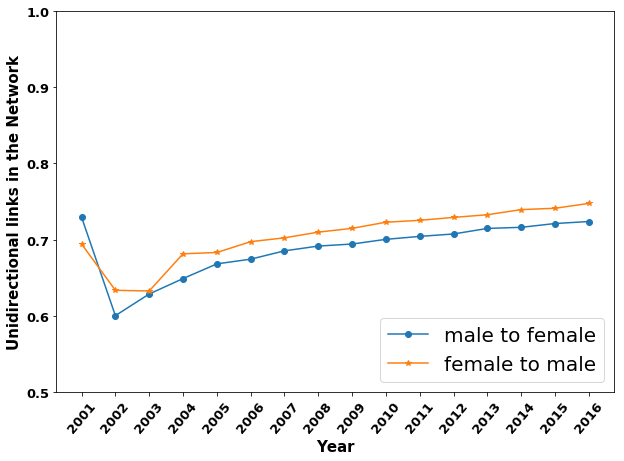

In [21]:
plot_male_to_female()

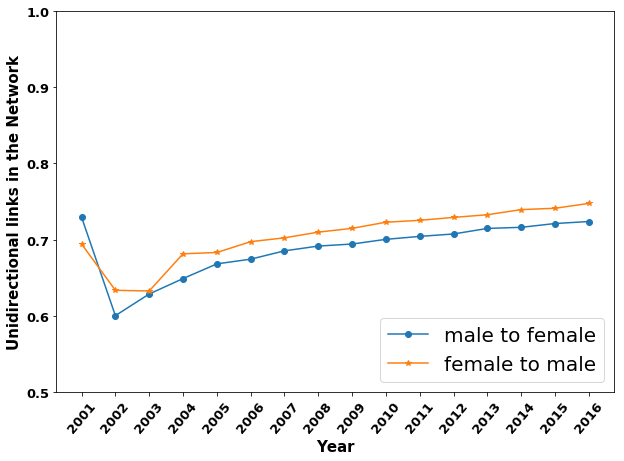

In [22]:
plot_male_to_female(image_name="male_female_zoom.png",range_yaxis=[0.5,1])

# Combined plot 

In [23]:
def combined_plot(image_name="double_plot.png", range_yaxis=[0.5,1]):
    x_label = [f.replace("_12_dir", "") for f in files]
    fig, ax = plt.subplots(figsize=(12, 12),nrows=2, ncols=1)
    ax,ax2 = ax
    # x_label = [f.replace("_12_dir", "") for f in files]
    ax.plot(x_label, lst, marker="o")
    ax.set_ylim(range_yaxis)
    # ax.set_xlabel("Year", fontsize=13, weight="bold")
    ax.set_xticklabels(x_label, rotation=50, fontsize=14, weight="bold")
    # ax.set_ylabel("Unidirectional links in the Network","o", fontsize=16, weight="bold")
    ax.set_ylabel("Unidirectional links in the network", fontsize=16, weight="bold")
    ax.set_yticklabels([round(i,2) for i in list(np.arange(range_yaxis[0],range_yaxis[1]+0.05,0.1))],
                       fontsize=13, weight="bold")

    ax2.plot(x_label, m_f_lst, marker="o", label="male to female")
    ax2.plot(x_label, f_m_lst, marker="*", label="female to male")
    ax2.set_ylim(range_yaxis)
    # ax.set_xlabel("Year", fontsize=13, weight="bold")
    ax2.set_xticklabels(x_label, rotation=50, fontsize=14, weight="bold")
    ax2.set_ylabel("Unidirectional links between the genders", fontsize=16, weight="bold")
    ax2.set_xlabel("Year", fontsize=16, weight="bold")
    ax2.legend(loc='lower right', fontsize=22)
    ax2.set_yticklabels([round(i,2) for i in list(np.arange(range_yaxis[0],range_yaxis[1]+0.05,0.1))],
                        fontsize=13, weight="bold")
    plt.savefig("../plots/unidirectional_links/"+image_name,bbox_inches = 'tight')
    plt.show()

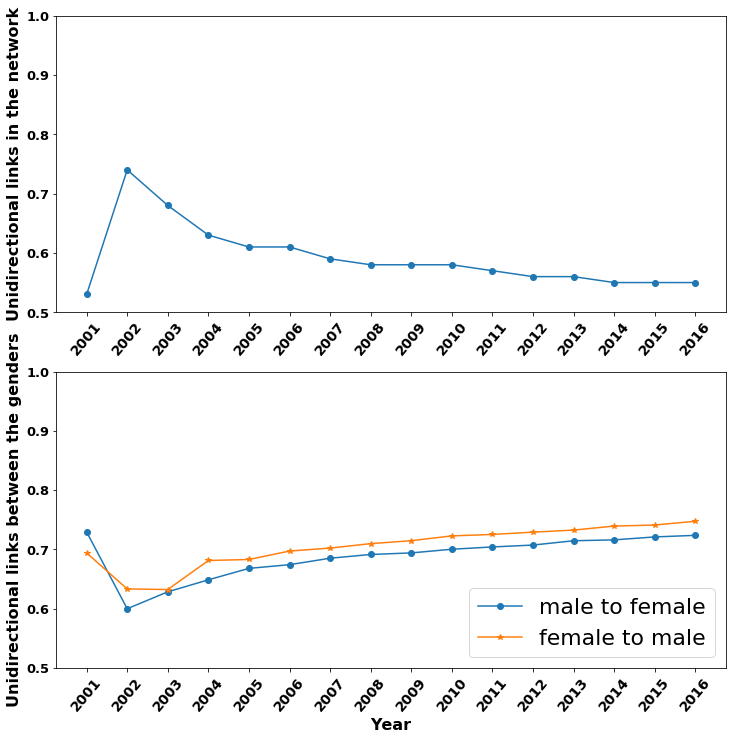

In [24]:
combined_plot()

In [25]:
def plot_with_inlay(image_name="combined_with_inlay.png", range_yaxis=[0.55,0.75], range_yaxis_main=[0.53,0.75], trim_from_file_name='_12_dir'):    
    fig,ax = plt.subplots(figsize=(18,12), facecolor='white')

    x_label = [f.replace(trim_from_file_name, "") for f in files]

    plt.plot(x_label, lst, marker="o")
    # plt.axis([0, 1, 1.1*np.amin(s), 2*np.amax(s)])
    ax.set_ylim(range_yaxis_main)
    ax.set_xlabel("Year", fontsize=22, weight="bold")
    ax.set_xticklabels(x_label, rotation=50, fontsize=22, weight="bold")
    # ax.set_ylabel("Unidirectional links in the Network","o", fontsize=16, weight="bold")
    ax.set_ylabel("Unidirectional links in the network", fontsize=22, weight="bold")
    ra = [round(i,2) for i in list(np.arange(range_yaxis_main[0],range_yaxis_main[1]+0.05,0.025))]
    print(ra)
    ax.set_yticklabels(ra , fontsize=18, weight="bold")
    ax.set_facecolor("white")
    left, bottom, width, height = .48, .45, .4, .35
    dim = [left, bottom,width, height]
    a = plt.axes(dim)
   

    plt.plot(x_label, m_f_lst, marker="o", label="male to female")
    plt.plot(x_label, f_m_lst, marker="*", label="female to male")
    # ax.set_xlabel("Year", fontsize=13, weight="bold")
    a.set_xticklabels(x_label, rotation=50, fontsize=18, weight="bold")
    a.set_ylabel("Unidirectional links between the genders", fontsize=20, weight="bold")
    a.set_xlabel("Year", fontsize=16, weight="bold")
    a.legend(loc='lower right', fontsize=26)
    a.set_ylim(range_yaxis)
    print(range_yaxis)
    ra = [round(i,2) for i in list(np.arange(range_yaxis_main[0],range_yaxis[1]+0.05,0.025))]    
    print(ra)
    a.set_yticklabels(ra ,fontsize=18, weight="bold")
    a.set_facecolor("white")
    
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 1

    plt.savefig("../plots/unidirectional_links/"+image_name,bbox_inches = 'tight')

    plt.show()

[0.53, 0.56, 0.58, 0.61, 0.63, 0.66, 0.68, 0.71, 0.73, 0.76, 0.78]
[0.55, 0.75]
[0.53, 0.56, 0.58, 0.61, 0.63, 0.66, 0.68, 0.71, 0.73, 0.76, 0.78]


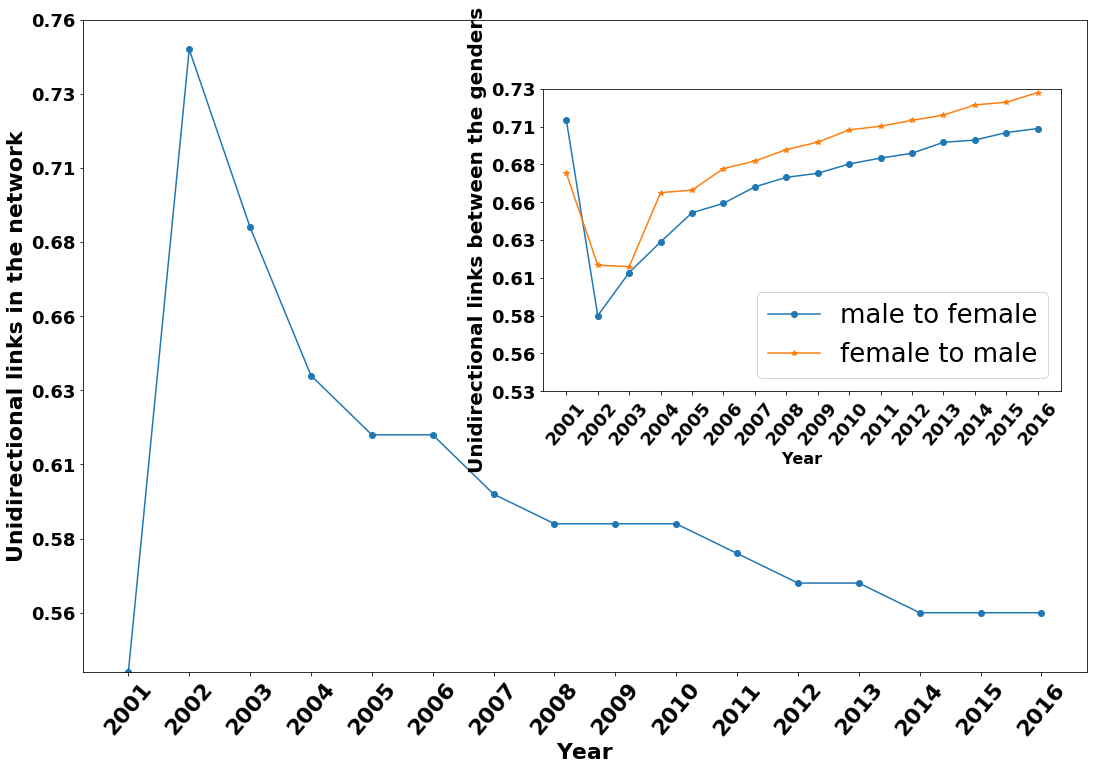

In [26]:
plot_with_inlay()

In [27]:
def gender_fractions_over_time(files,gender_from, gender_to,path_to_graphs="../data/filtered_graphs/country_unidirectional/de/"):
    lst = []
    for file in files: 
        d_graph = nx.read_gpickle(join(path_to_graphs, file))
        lst.append(fraction_unidirected_pairs_gender(d_graph, gender_from, gender_to))
    return lst

In [28]:
files = get_files("../data/filtered_graphs/country_unidirectional/de/", "dir_dir")

In [29]:
lst = []
for file in files: 
    d_graph = nx.read_gpickle(join("../data/filtered_graphs/country_unidirectional/ru/", file))
    lst.append(fraction_unidirected_pairs(d_graph))

In [30]:
# plot_with_inlay(image_name="combined_with_inlay_de.png", range_yaxis=[0.45,0.8], range_yaxis_main=[0.55,0.85],trim_from_file_name='_12_dir_dir')

In [31]:
def plot_with_inlay_country(country_sufix='de',image_name="combined_with_inlay_de.png",country_name='Germany',
                            range_yaxis_main=[0.53,0.75], range_yaxis=[0.55,0.75], trim_from_file_name='_12_dir_dir'): 
    
    fig,ax = plt.subplots(figsize=(18,12), facecolor='white')
    
    files = get_files("../data/filtered_graphs/country_unidirectional/{}/".format(country_sufix), "dir_dir")
    m_f_lst = gender_fractions_over_time(files, "male", "female",
                            path_to_graphs="../data/filtered_graphs/country_unidirectional/{}/".format(country_sufix))
    f_m_lst = gender_fractions_over_time(files, "female", "male",
                            path_to_graphs="../data/filtered_graphs/country_unidirectional/{}/".format(country_sufix))

    lst = []
    for file in files: 
        d_graph = nx.read_gpickle(join("../data/filtered_graphs/country_unidirectional/{}".format(country_sufix), file))
        lst.append(fraction_unidirected_pairs(d_graph))
        
    print("GENERAL:", lst)
    print("M_F", m_f_lst)
    print("F_M", f_m_lst)

    x_label = [f.replace(trim_from_file_name, "") for f in files]

    plt.plot(x_label, lst, marker="o")
    # plt.axis([0, 1, 1.1*np.amin(s), 2*np.amax(s)])
    ax.set_ylim(range_yaxis_main)
    ax.set_xlabel("Year", fontsize=22, weight="bold")
    ax.set_xticklabels(x_label, rotation=50, fontsize=22, weight="bold")
    # ax.set_ylabel("Unidirectional links in the Network","o", fontsize=16, weight="bold")
    ax.set_ylabel("Unidirectional links in the network - {}".format(country_name), fontsize=22, weight="bold")
    fontproperties = {'weight' : 'bold', 'size' : 22}
    ax.set_yticklabels(np.round(ax.get_yticks(), decimals=1), fontproperties)
    ax.set_facecolor("white")
    left, bottom, width, height = .48, .50, .4, .35
    dim = [left, bottom,width, height]
    a = plt.axes(dim)
   

    plt.plot(x_label, m_f_lst, marker="o", label="male to female")
    plt.plot(x_label, f_m_lst, marker="*", label="female to male")
    # ax.set_xlabel("Year", fontsize=13, weight="bold")
    a.set_xticklabels(x_label, rotation=50, fontsize=18, weight="bold")
    a.set_ylabel("Unidirectional links by gender", fontsize=18, weight="bold")
    a.set_xlabel("Year", fontsize=16, weight="bold")
    a.legend(loc='lower right', fontsize=26)
    a.set_ylim(range_yaxis)
    fontproperties = {'weight' : 'bold', 'size' : 20}
    a.set_yticklabels(np.round(a.get_yticks(), decimals=2), fontproperties)
    a.set_facecolor("white")
    
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 1

    plt.savefig("../plots/unidirectional_links/"+image_name,bbox_inches = 'tight')

    plt.show()

GENERAL: [0.88, 0.89, 0.62, 0.64, 0.58, 0.61, 0.59, 0.57, 0.57, 0.56, 0.57, 0.58, 0.57, 0.57, 0.6, 0.6]
M_F [0.5714285714285714, 0.48484848484848486, 0.6551724137931034, 0.6558823529411765, 0.6866359447004609, 0.6843003412969283, 0.6878378378378378, 0.7220376522702104, 0.7239208633093526, 0.7085463842220598, 0.7064160725858717, 0.6956004756242569, 0.7113459399332592, 0.7168737060041408, 0.6848646249445184, 0.6968325791855203]
F_M [0.5714285714285714, 0.48484848484848486, 0.6551724137931034, 0.6323529411764706, 0.6658986175115207, 0.6911262798634812, 0.6810810810810811, 0.7198228128460686, 0.7149280575539568, 0.7319211102994887, 0.7271548930654569, 0.7033293697978596, 0.7202447163515017, 0.7256728778467909, 0.7035064358632934, 0.6997120526532291]


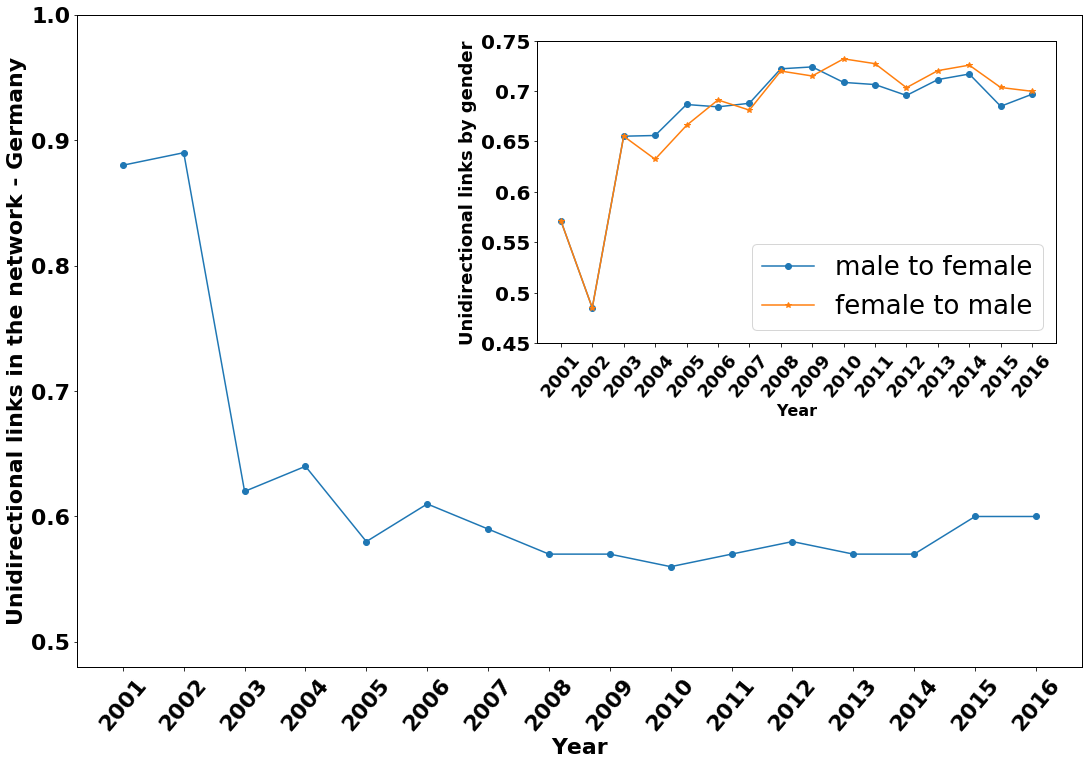

In [32]:
plot_with_inlay_country(country_sufix='de', image_name="combined_with_inlay_de.png",country_name='Germany',
                            range_yaxis_main=[0.48,1], range_yaxis=[0.45,0.75])

GENERAL: [0.43, 0.57, 0.64, 0.59, 0.61, 0.62, 0.61, 0.61, 0.64, 0.64, 0.62, 0.62, 0.62, 0.61, 0.6, 0.59]
M_F [0.9130434782608695, 0.65625, 0.6096866096866097, 0.6495412844036698, 0.667017359284587, 0.6676682692307693, 0.6702222222222223, 0.6717357105401154, 0.6590588898281206, 0.6499435595133576, 0.6692419121197489, 0.6661394192746583, 0.6781236941078145, 0.6848245180425111, 0.6848061869282278, 0.6881129135734579]
F_M [0.8043478260869565, 0.7421875, 0.6581196581196581, 0.6963302752293578, 0.6917411888479748, 0.6974158653846154, 0.6922222222222222, 0.6885159937073938, 0.687235841081995, 0.6871942806973536, 0.6916948334138098, 0.7004858208112078, 0.7052862515670706, 0.7141868512110726, 0.7170612090917665, 0.7187242232609293]


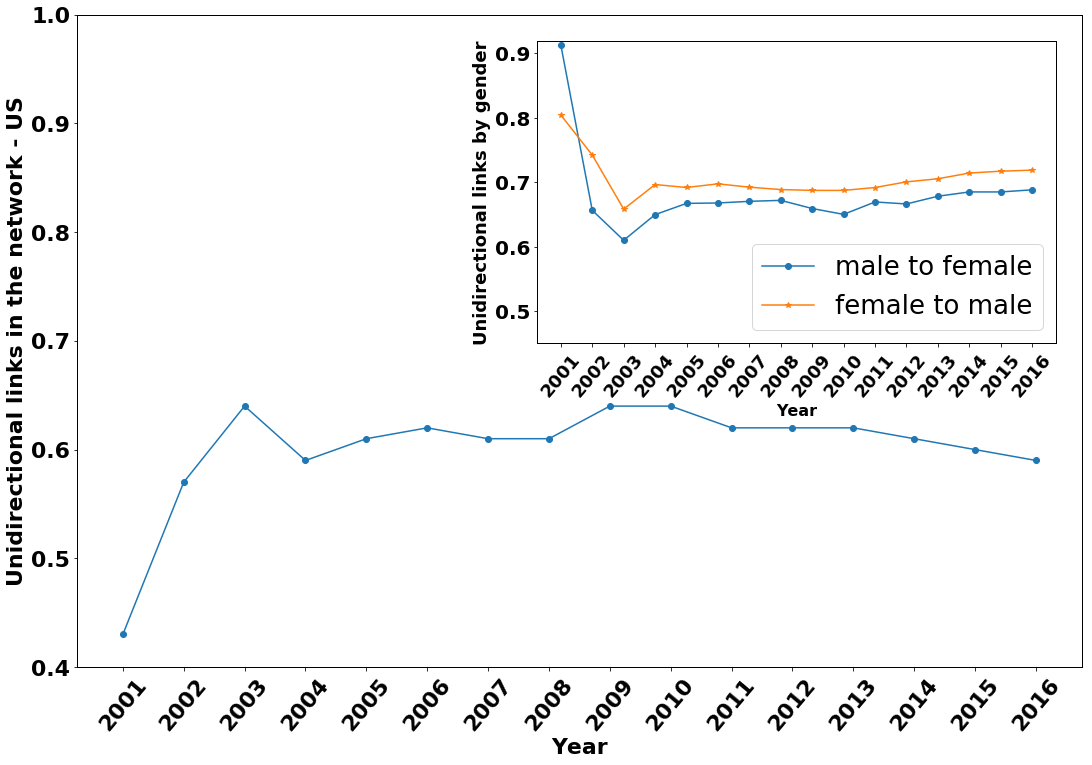

In [33]:
plot_with_inlay_country(country_sufix='us', image_name="combined_with_inlay_us.png",country_name='US',
                            range_yaxis_main=[0.4,1], range_yaxis=[0.45,0.92])

GENERAL: [0.6, 0.77, 0.5, 0.61, 0.6, 0.6, 0.63, 0.62, 0.63, 0.63, 0.64, 0.65, 0.66, 0.66, 0.65, 0.64]
M_F [0.6666666666666666, 0.6, 0.75, 0.6621621621621622, 0.6691729323308271, 0.6613756613756614, 0.6461038961038961, 0.6124031007751938, 0.6478555304740407, 0.6698473282442748, 0.6459016393442623, 0.6193921852387844, 0.6410596026490066, 0.6306532663316583, 0.6292682926829268, 0.6635514018691588]
F_M [0.6666666666666666, 0.6, 0.75, 0.6621621621621622, 0.5864661654135338, 0.7142857142857143, 0.6688311688311688, 0.6666666666666666, 0.6772009029345373, 0.7022900763358778, 0.6721311475409836, 0.6772793053545586, 0.6622516556291391, 0.6482412060301508, 0.6524390243902439, 0.6612149532710281]


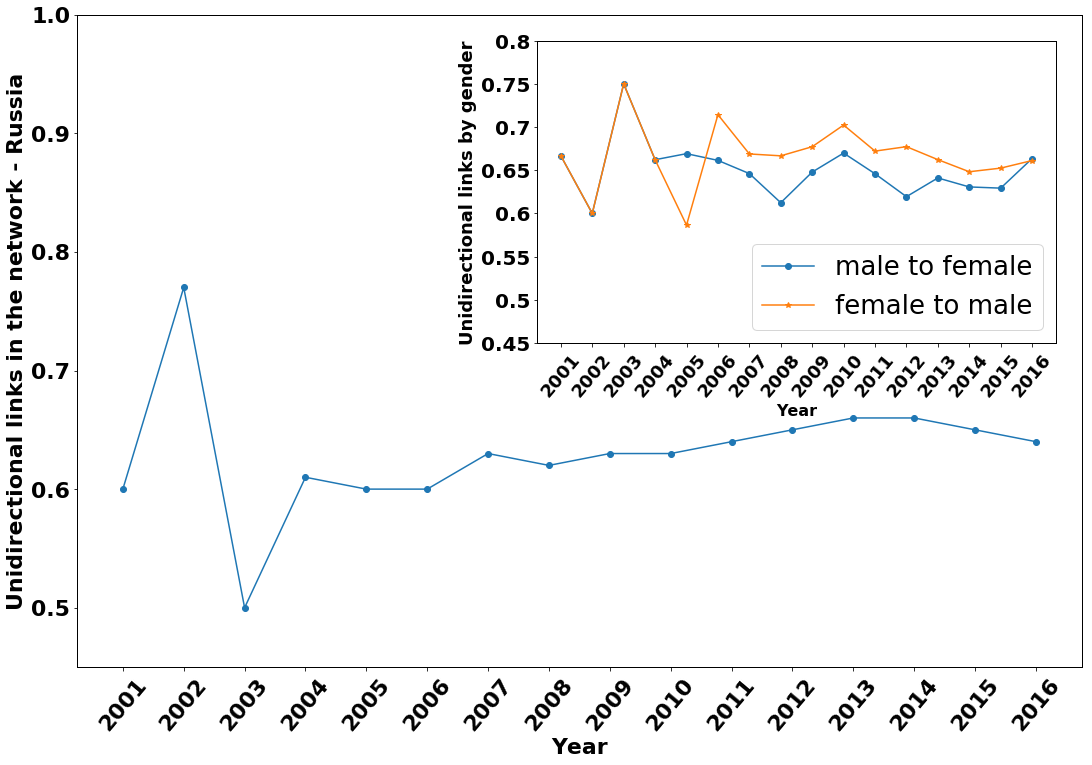

In [34]:
plot_with_inlay_country(country_sufix='ru', image_name="combined_with_inlay_ru.png",country_name='Russia',
                            range_yaxis_main=[0.45,1], range_yaxis=[0.45,0.8])

GENERAL: [1.0, 0.9, 0.81, 0.67, 0.62, 0.61, 0.57, 0.54, 0.54, 0.54, 0.54, 0.55, 0.54, 0.54, 0.53, 0.54]
M_F [0.0, 0.5555555555555556, 0.5740740740740741, 0.6335149863760218, 0.6587982832618026, 0.6452223273415326, 0.690067214339059, 0.7347222222222223, 0.701363073110285, 0.7093225246091488, 0.7300546448087432, 0.7434761201378631, 0.7166513339466422, 0.7194968553459119, 0.7434184675834971, 0.7303075768942235]
F_M [0.0, 0.5555555555555556, 0.5555555555555556, 0.6376021798365122, 0.6673819742489271, 0.6896877956480606, 0.7050037341299478, 0.7243055555555555, 0.7453531598513011, 0.738274464389114, 0.7475409836065574, 0.7474150664697193, 0.7543698252069917, 0.7484276729559748, 0.7634577603143419, 0.7591897974493623]


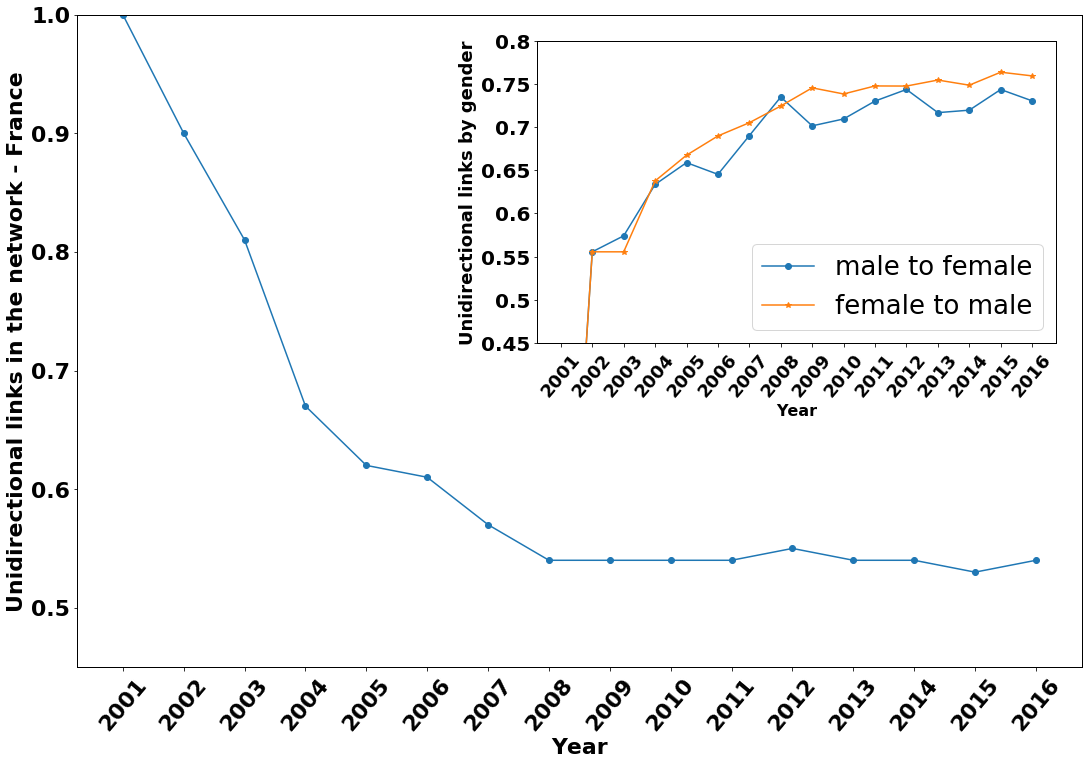

In [35]:
plot_with_inlay_country(country_sufix='fr', image_name="combined_with_inlay_fr.png",country_name='France',
                            range_yaxis_main=[0.45,1], range_yaxis=[0.45,0.8])

GENERAL: [None, None, 1.0, 0.6, 0.58, 0.56, 0.58, 0.55, 0.5, 0.49, 0.48, 0.49, 0.46, 0.44, 0.43, 0.42]
M_F [None, None, 0.4, 0.5333333333333333, 0.6774193548387096, 0.66, 0.7619047619047619, 0.7142857142857143, 0.7857142857142857, 0.8155339805825242, 0.75, 0.8208955223880597, 0.8201438848920863, 0.8068965517241379, 0.8, 0.803921568627451]
F_M [None, None, 0.4, 0.5333333333333333, 0.8064516129032258, 0.74, 0.7777777777777778, 0.7285714285714285, 0.8214285714285714, 0.912621359223301, 0.8916666666666667, 0.835820895522388, 0.9064748201438849, 0.896551724137931, 0.86, 0.9019607843137255]


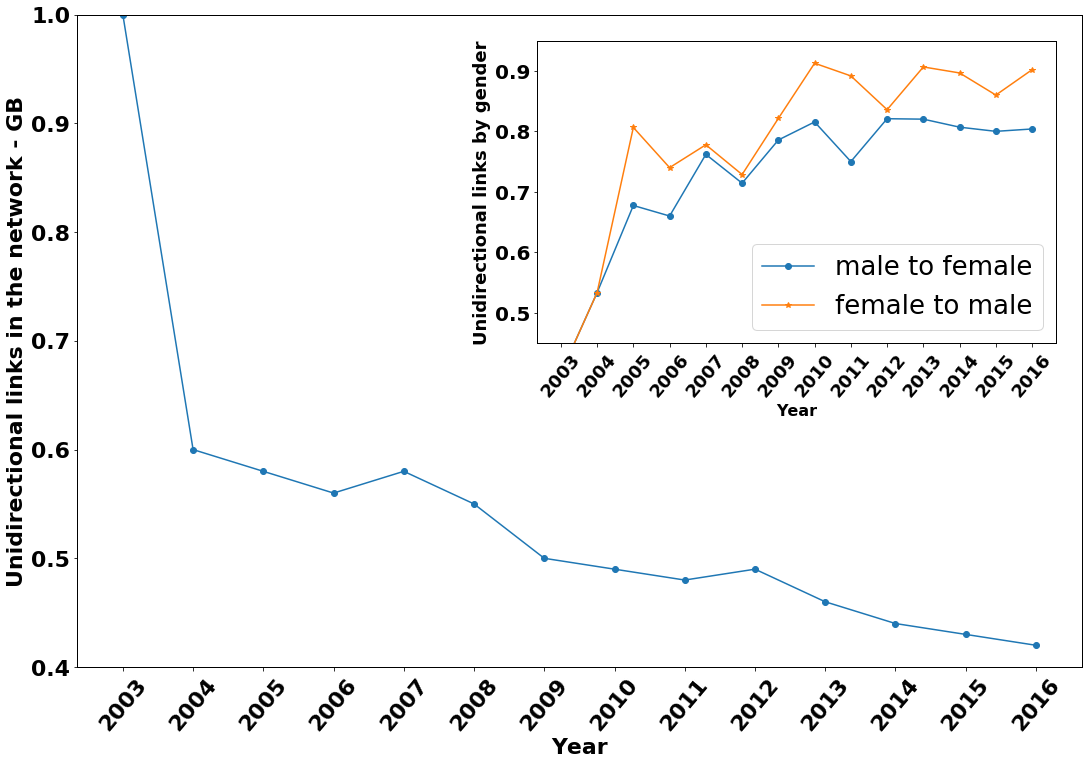

In [36]:
plot_with_inlay_country(country_sufix='gb', image_name="combined_with_inlay_gb.png",country_name='GB',
                            range_yaxis_main=[0.4,1], range_yaxis=[0.45,0.95])